A senior engineer in your team has requested that you predict the runoff hydrograph using different analytical approaches and contrast and compare the two in a technical report for internal audiences. The catchment details are shown below. The senior requested in particular the development of runoff hydrographs using both an analytical kinematic wave and a pond model approach (`Numerical Models`).

* Catchment area – 2.0 ha with dimensions of 100 m x 200 m
* Slope - 1.0%
* Roughness - 0.100
* Rainfall event - 63mm/h for 50 mins
* Losses - Initial losses of 2mm and continuing losses of 3mm/h.

At the outlet of the catchment, you can assume that flow is instantaneously transmitted from one edge of the catchment to the other in a channel.

Your report needs to present the two predicted hydrographs and a discussion of similarities and differences.  The senior engineer has requested a maximum of a 5 page report exclusive of calculations that can be included as appendices. Excel spreadsheets can be included as appendices. The report needs to adopt appropriate referencing and exploration of data as needed.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import math
import csv
import os
import copy

In [128]:
# inputs
catch_area = 4          # ha
width = 400             # m
slope = 1.5             # %
roughness = 0.075       # s/m^1/3
intensity = 73          # mm/h
duration = 60           # min
ini_loss = 2            # mm
cont_loss = 3           # mm/h

step = 60               # s

var0 = {
    'catch_area':copy.copy(catch_area),
    'width':copy.copy(width),
    'slope':copy.copy(slope),
    'roughness':copy.copy(roughness),
    'intensity':copy.copy(intensity),
    'duration':copy.copy(duration),
    'ini_loss':copy.copy(ini_loss),
    'cont_loss':copy.copy(cont_loss),
    'step':copy.copy(step)
    }

for key, value in var0.items():
    print('{:<10}: {}'.format(key, value), sep='\n')

catch_area: 4
width     : 400
slope     : 1.5
roughness : 0.075
intensity : 73
duration  : 60
ini_loss  : 2
cont_loss : 3
step      : 60


In [129]:
arg_output_dir='./Outputs_CM_Assignment_3/'

arg_output_dir

'./Outputs_CM_Assignment_3/'

In [130]:
def create_output_dir(arg_output_dir):
    """create output directory if it does not exist

    arguments:
        arg_output_dir = [string] './Outputs_CM_Assignment_2/'
    """
    if not os.path.exists(arg_output_dir):
        os.makedirs(arg_output_dir)

In [131]:
create_output_dir(arg_output_dir)

In [132]:
catch_area = catch_area*10000
length = catch_area/width
slope = slope/100
intensity = intensity/(1000*3600)
duration = duration*60
ini_loss = ini_loss/1000
cont_loss = cont_loss/(1000*3600)

ini_loss_dur = ini_loss/intensity
rainfall_excess = intensity - cont_loss
alpha = math.sqrt(slope)/roughness
beta = 5/3
time_conc_rel = (length/(alpha*(rainfall_excess**(beta - 1))))**(1/beta)
time_conc_abs = time_conc_rel + ini_loss_dur

for key, value in {
    'catch_area':catch_area,
    'width':width,
    'length':length,
    'slope':slope,
    'roughness':roughness,
    'intensity':intensity,
    'duration':duration,
    'ini_loss':ini_loss,
    'cont_loss':cont_loss,
    'ini_loss_dur':ini_loss_dur,
    'rainfall_excess':rainfall_excess,
    'alpha':alpha,
    'beta':beta,
    'time_conc_rel':time_conc_rel,
    'time_conc_abs':time_conc_abs,
    'step':step
    }.items():
    print('{:<15}: {}'.format(key, value), sep='\n')

catch_area     : 40000
width          : 400
length         : 100.0
slope          : 0.015
roughness      : 0.075
intensity      : 2.0277777777777776e-05
duration       : 3600
ini_loss       : 0.002
cont_loss      : 8.333333333333333e-07
ini_loss_dur   : 98.63013698630138
rainfall_excess: 1.9444444444444442e-05
alpha          : 1.632993161855452
beta           : 1.6666666666666667
time_conc_rel  : 905.0887455198518
time_conc_abs  : 1003.7188825061532
step           : 60


In [133]:
var = {
    'catch_area':catch_area, 'width':width, 'length':length, 
    'slope':slope, 'roughness':roughness, 
    'intensity':intensity, 'duration':duration, 
    'ini_loss':ini_loss, 'cont_loss':cont_loss, 'ini_loss_dur':ini_loss_dur, 
    'rainfall_excess':rainfall_excess, 
    'alpha':alpha, 'beta':beta, 
    'time_conc_rel':time_conc_rel, 'time_conc_abs':time_conc_abs, 
    'step':step
    }

var0['length'] = length
var0['step'] = step/60
var0['ini_loss_dur'] = ini_loss_dur/60
var0['rainfall_excess'] = rainfall_excess*1000*3600
var0['alpha'] = alpha
var0['beta'] = beta
var0['time_conc_rel'] = time_conc_rel/60
var0['time_conc_abs'] = time_conc_abs/60
var0 = {key: var0[key] for key in var if key in var0}

for key, val, val0 in zip(var.keys(), var.values(), var0.values()):
    print('{:<15}\t: {:<22}: {:<22}'.format(key, val0, val))

catch_area     	: 4                     : 40000                 
width          	: 400                   : 400                   
length         	: 100.0                 : 100.0                 
slope          	: 1.5                   : 0.015                 
roughness      	: 0.075                 : 0.075                 
intensity      	: 73                    : 2.0277777777777776e-05
duration       	: 60                    : 3600                  
ini_loss       	: 2                     : 0.002                 
cont_loss      	: 3                     : 8.333333333333333e-07 
ini_loss_dur   	: 1.6438356164383563    : 98.63013698630138     
rainfall_excess	: 69.99999999999999     : 1.9444444444444442e-05
alpha          	: 1.632993161855452     : 1.632993161855452     
beta           	: 1.6666666666666667    : 1.6666666666666667    
time_conc_rel  	: 15.084812425330863    : 905.0887455198518     
time_conc_abs  	: 16.728648041769222    : 1003.7188825061532    
step           	: 1.0    

In [134]:
input_data = [{'key': key, 'value0':val0, 'value1':val1} for key, val0, val1 in zip(var.keys(), var0.values(), var.values())]
key_input = ['key', 'value0', 'value1']

with open (
    file='{}_data_Kinematic_and_Pond_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.csv'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ),
    mode='w',
    newline='') as file:
    writer = csv.DictWriter(file, fieldnames=key_input)
    writer.writeheader()
    writer.writerows(input_data)

In [135]:
def kinematic_wave_eq(
    step,
    ini_loss_dur,
    time_conc_abs,
    duration,
    rainfall_excess,
    alpha,
    beta,
    width,
    length
    ):

    # rl: rising limb
    rl_time_sec = np.concatenate((
        np.arange(start=0, stop=ini_loss_dur, step=step),
        np.array(object=[ini_loss_dur]),
        np.arange(start=ini_loss_dur - ini_loss_dur%step + step, stop=time_conc_abs, step=step),
        np.array(object=[time_conc_abs])
        ))
    rl_rel_time_sec = np.where(rl_time_sec - ini_loss_dur < 0, 0, rl_time_sec - ini_loss_dur)
    rl_depth = rl_rel_time_sec*rainfall_excess
    rl_unit_flow_rate = alpha*rl_depth**beta
    rl_flow_rate = rl_unit_flow_rate*width

    # el: equilibrium limb
    el_time_sec = np.arange(start=rl_time_sec[-1] - rl_time_sec[-1]%step + step, stop=duration, step=step)
    el_rel_time_sec = el_time_sec - ini_loss_dur
    el_depth = np.ones(shape=el_rel_time_sec.size)*rl_depth[-1]
    el_unit_flow_rate = np.ones(shape=el_rel_time_sec.size)*rl_unit_flow_rate[-1]
    el_flow_rate = np.ones(shape=el_rel_time_sec.size)*rl_flow_rate[-1]

    # fl: falling limb
    fl_time_sec = np.concatenate((
        np.array([duration]),
        np.arange(start=duration - duration%step + step, stop=duration*7, step=step),
        ))
    fl_rel_time_sec = fl_time_sec - ini_loss_dur
    fl_unit_flow_rate = []
    for t in fl_rel_time_sec:
        def solver_function(q, tr=duration - ini_loss_dur, t=t, i=rainfall_excess, l=length, b=beta, a=alpha):
            return q - i*l + (t - tr)*i*b*(a**(1/b))*(q**((b - 1)/b))
        q = optimize.root(fun=solver_function, x0=0, tol=1E-10)
        q = q.x[0]
        fl_unit_flow_rate.append(q)
    fl_unit_flow_rate = np.array(fl_unit_flow_rate)
    fl_depth = (fl_unit_flow_rate/alpha)**(1/beta)
    fl_flow_rate = fl_unit_flow_rate*width

    # wrapping up
    time_sec = np.concatenate((
        rl_time_sec,
        el_time_sec,
        fl_time_sec
        ))
    time_min = time_sec/60
    rel_time_sec = np.concatenate((
        rl_rel_time_sec,
        el_rel_time_sec,
        fl_rel_time_sec
        ))
    depth = np.concatenate((
        rl_depth,
        el_depth,
        fl_depth
        ))
    unit_flow_rate = np.concatenate((
        rl_unit_flow_rate,
        el_unit_flow_rate,
        fl_unit_flow_rate
        ))
    flow_rate = np.concatenate((
        rl_flow_rate,
        el_flow_rate,
        fl_flow_rate
        ))
    delta_time = np.concatenate((
        np.array(object=[0]),
        np.diff(a=time_sec)
        ))
    flow_rate_left = np.roll(a=flow_rate, shift=1)
    flow_rate_left[0] = 0
    flow_rate_right = flow_rate.copy()
    flow_rate_right[0] = 0
    volume = (flow_rate_left + flow_rate_right)*delta_time/2
    volume = np.cumsum(a=volume)

    return pd.DataFrame(
        data=np.column_stack((
            time_min,
            time_sec,
            rel_time_sec,
            depth,
            unit_flow_rate,
            flow_rate,
            volume
            )),
        columns=['t_min', 't_sec', 't_rel', 'y', 'q', 'Q', 'V'])

In [136]:
kin_results = kinematic_wave_eq(
    step,
    ini_loss_dur,
    time_conc_abs,
    duration,
    rainfall_excess,
    alpha,
    beta,
    width,
    length
    )
kin_results.to_csv(
    path_or_buf='{}Q_Kinematic_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.csv'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ), index=False)

kin_results

,t_min,t_sec,t_rel,y,q,Q,V
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,1.000000,60.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,1.643836,98.630137,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,2.000000,120.000000,21.369863,0.000416,3.778445e-06,0.001511,0.016149
4,3.000000,180.000000,81.369863,0.001582,3.508188e-05,0.014033,0.482473
...,...,...,...,...,...,...,...
417,415.000000,24900.000000,24801.369863,0.000072,2.017622e-07,0.000081,2722.962140
418,416.000000,24960.000000,24861.369863,0.000071,2.003487e-07,0.000080,2722.966966
419,417.000000,25020.000000,24921.369863,0.000071,1.989490e-07,0.000080,2722.971757
420,418.000000,25080.000000,24981.369863,0.000071,1.975630e-07,0.000079,2722.976515


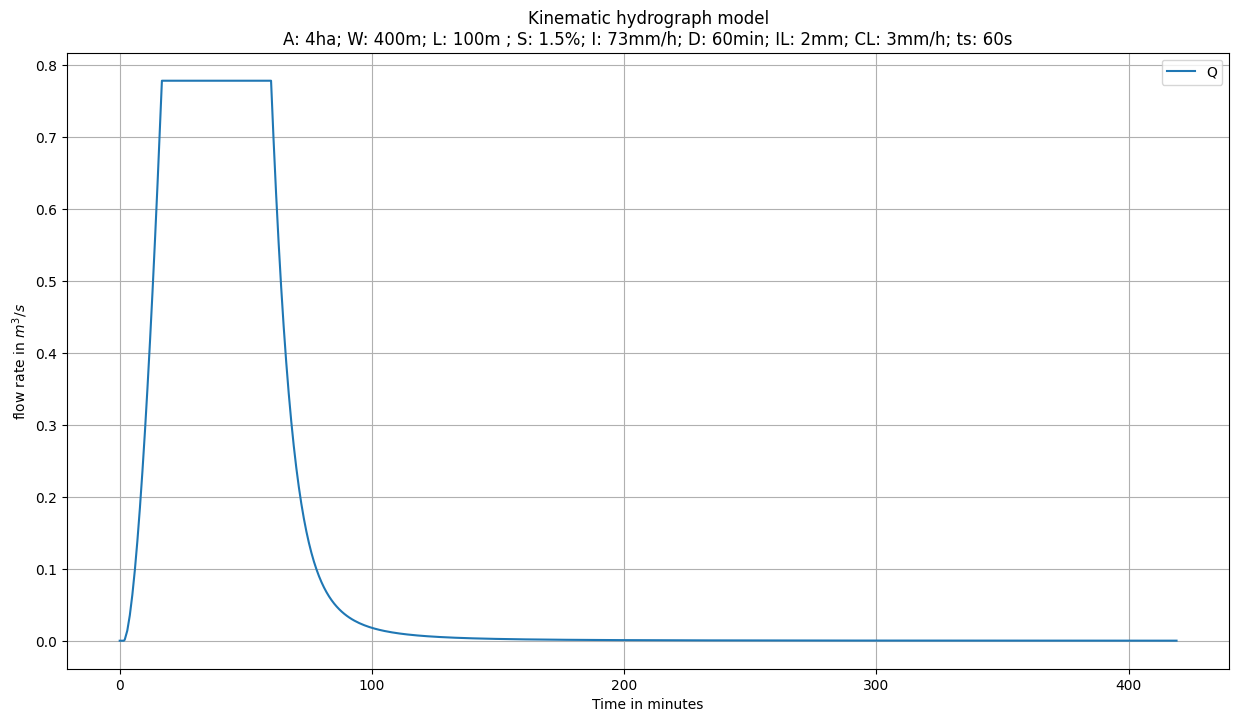

In [137]:
fig, ax = plt.subplots(figsize=(15,8))
ax = kin_results.plot(
    x='t_min',
    y='Q',
    kind='line',
    ax=ax,
    title='Kinematic hydrograph model\nA: {}ha; W: {}m; L: {}m ; S: {}%; I: {}mm/h; D: {}min; IL: {}mm; CL: {}mm/h; ts: {}s'.format(
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ),
    grid=True,
    xlabel='Time in minutes',
    ylabel='flow rate in $m^{3}/s$'
    )
fig.savefig(
    fname='{}Q_Kinematic_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.png'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ))

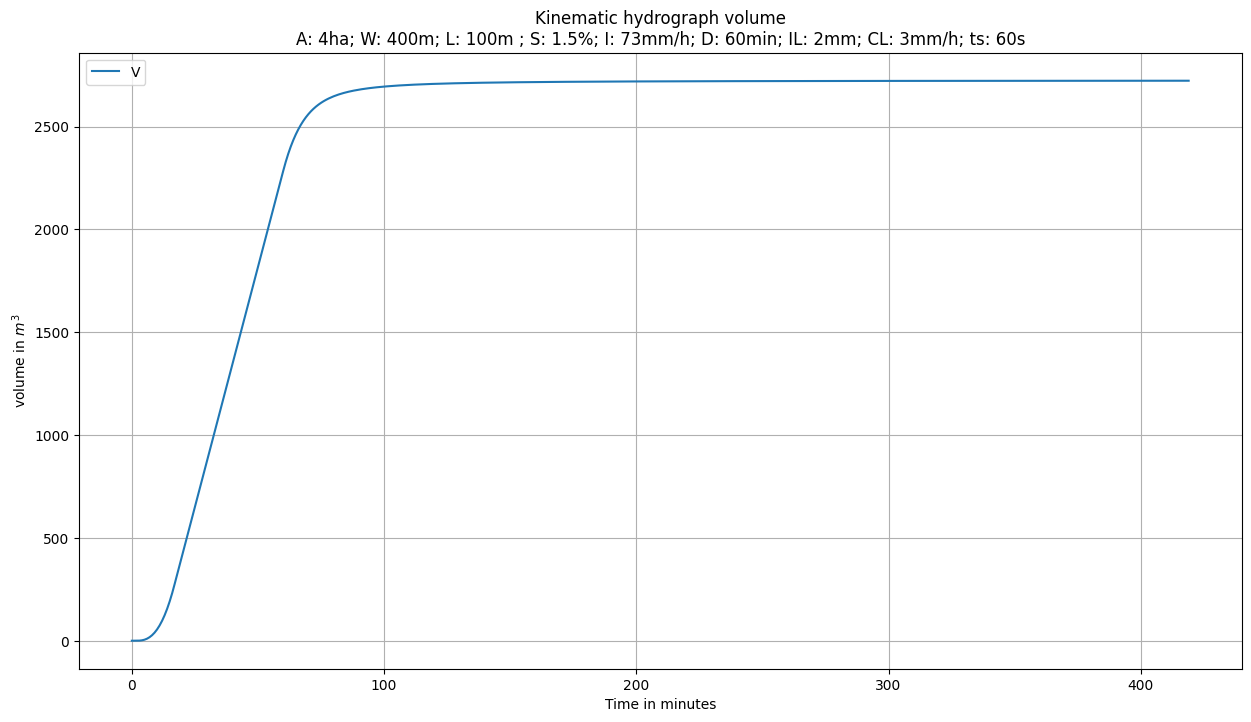

In [138]:
fig, ax = plt.subplots(figsize=(15,8))
ax = kin_results.plot(
    x='t_min',
    y='V',
    kind='line',
    ax=ax,
    title='Kinematic hydrograph volume\nA: {}ha; W: {}m; L: {}m ; S: {}%; I: {}mm/h; D: {}min; IL: {}mm; CL: {}mm/h; ts: {}s'.format(
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ),
    grid=True,
    xlabel='Time in minutes',
    ylabel='volume in $m^{3}$'
    )
fig.savefig(
    fname='{}V_Kinematic_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.png'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ))

In [139]:
def pond_model_eq(
    step,
    ini_loss_dur,
    time_conc_abs,
    duration,
    rainfall_excess,
    alpha,
    beta,
    width,
    length
    ):

    time_sec = np.concatenate((
        np.arange(start=0, stop=ini_loss_dur, step=step),
        np.array([ini_loss_dur]),
        np.arange(start=ini_loss_dur - ini_loss_dur%step + step, stop=time_conc_abs, step=step),
        np.array([time_conc_abs]),
        np.arange(start=time_conc_abs - time_conc_abs%step + step, stop=duration, step=step),
        np.array([duration]),
        np.arange(start=duration - duration%step + step, stop=duration*7, step=step)
    ))
    time_min = time_sec/60

    delta_time = np.concatenate((
        np.array([0]),
        np.diff(a=time_sec)
        ))

    i_prom = np.where((time_sec <= ini_loss_dur) | (time_sec > duration), 0, rainfall_excess*width*length*delta_time)

    depth = []
    y0 = 0
    for dt, ip in zip(delta_time, i_prom):
        def solver_function(y1, y0=y0, w=width, l=length, a=alpha, b=beta, dt=dt, ip=ip):
            return ip - w*a*(y1**b + y0**b)*dt/2 - w*l*(y1 - y0)
        y1 = optimize.root(fun=solver_function, x0=0, tol=1E-10)
        y1 = y1.x[0]
        depth.append(y1)
        y0 = y1
    depth = np.array(depth)

    o_prom = []
    y0 = 0
    for y1, dt in zip(depth, delta_time):
        op = width*alpha*(y0**beta + y1**beta)*dt/2
        o_prom.append(op)
        y0 = y1
    o_prom = np.array(o_prom)

    flow_rate = width*alpha*(depth**beta)

    delta_time = np.concatenate((
        np.array(object=[0]),
        np.diff(a=time_sec)
        ))
    flow_rate_left = np.roll(a=flow_rate, shift=1)
    flow_rate_left[0] = 0
    flow_rate_right = flow_rate.copy()
    flow_rate_right[0] = 0
    volume = (flow_rate_left + flow_rate_right)*delta_time/2
    volume = np.cumsum(a=volume)

    return pd.DataFrame(
        data=np.column_stack((time_min, time_sec, delta_time, i_prom, o_prom, depth, flow_rate, volume)),
        columns=['t_min', 't_sec', 'dt', 'i_prom', 'o_prom', 'y', 'Q', 'V'])

In [140]:
pond_results = pond_model_eq(
    step,
    ini_loss_dur,
    time_conc_abs,
    duration,
    rainfall_excess,
    alpha,
    beta,
    width,
    length
    )
pond_results.to_csv(
    path_or_buf='{}Q_Pond_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.csv'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ), index=False)

pond_results

,t_min,t_sec,dt,i_prom,o_prom,y,Q,V
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.643836,98.630137,38.630137,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.000000,120.000000,21.369863,16.621005,0.016123,0.000415,0.001509,0.016123
4,3.000000,180.000000,60.000000,46.666667,0.460975,0.001570,0.013857,0.477098
...,...,...,...,...,...,...,...,...
417,415.000000,24900.000000,60.000000,0.000000,0.041131,0.000258,0.000683,2712.965247
418,416.000000,24960.000000,60.000000,0.000000,0.040860,0.000257,0.000679,2713.006107
419,417.000000,25020.000000,60.000000,0.000000,0.040591,0.000256,0.000674,2713.046698
420,418.000000,25080.000000,60.000000,0.000000,0.040325,0.000255,0.000670,2713.087023


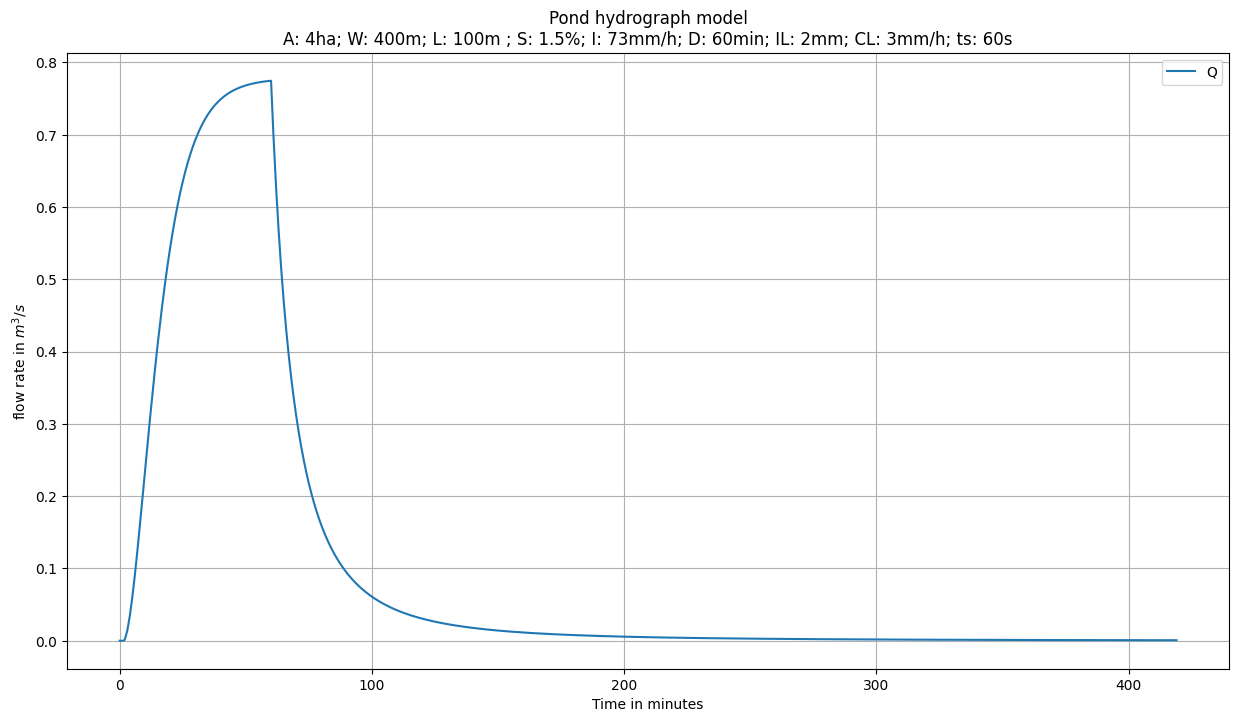

In [141]:
fig, ax = plt.subplots(figsize=(15,8))
ax = pond_results.plot(
    x='t_min',
    y='Q',
    kind='line',
    ax=ax,
    title='Pond hydrograph model\nA: {}ha; W: {}m; L: {}m ; S: {}%; I: {}mm/h; D: {}min; IL: {}mm; CL: {}mm/h; ts: {}s'.format(
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ),
    grid=True,
    xlabel='Time in minutes',
    ylabel='flow rate in $m^{3}/s$'
    )
fig.savefig(
    fname='{}Q_Pond_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.png'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ))

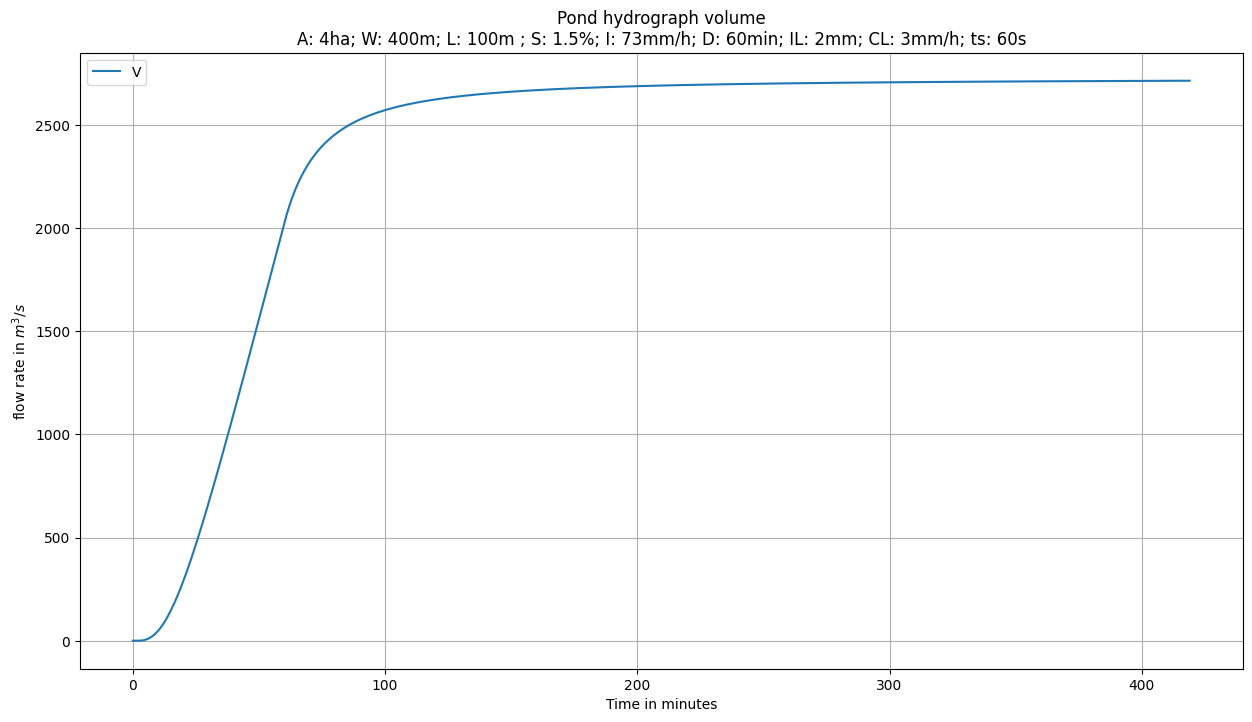

In [142]:
fig, ax = plt.subplots(figsize=(15,8))
ax = pond_results.plot(
    x='t_min',
    y='V',
    kind='line',
    ax=ax,
    title='Pond hydrograph volume\nA: {}ha; W: {}m; L: {}m ; S: {}%; I: {}mm/h; D: {}min; IL: {}mm; CL: {}mm/h; ts: {}s'.format(
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ),
    grid=True,
    xlabel='Time in minutes',
    ylabel='flow rate in $m^{3}/s$'
    )
fig.savefig(
    fname='{}V_Pond_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.png'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ))

In [143]:
kin_pond_results = pd.concat(objs=[
    kin_results.t_sec,
    kin_results.t_min,
    kin_results.Q,
    # pond_results.t_sec,
    # pond_results.t_min,
    pond_results.Q,
    kin_results.V,
    pond_results.V
    ], axis=1)
kin_pond_results.columns = [
    't_sec', 't_min',
    # 't_sec_kinematic', 't_min_kinematic', 
    'Q_Kinematic_model', 
    # 't_sec_pond', 't_min_pond', 
    'Q_Pond_model',
    'V_Kinematic_model',
    'V_Pond_model'
    ]
kin_pond_results.to_csv(
    path_or_buf='{}Kinematic_and_Pond_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.csv'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ), index=False)

kin_pond_results

,t_sec,t_min,Q_Kinematic_model,Q_Pond_model,V_Kinematic_model,V_Pond_model
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,98.630137,1.643836,0.000000,0.000000,0.000000,0.000000
3,120.000000,2.000000,0.001511,0.001509,0.016149,0.016123
4,180.000000,3.000000,0.014033,0.013857,0.482473,0.477098
...,...,...,...,...,...,...
417,24900.000000,415.000000,0.000081,0.000683,2722.962140,2712.965247
418,24960.000000,416.000000,0.000080,0.000679,2722.966966,2713.006107
419,25020.000000,417.000000,0.000080,0.000674,2722.971757,2713.046698
420,25080.000000,418.000000,0.000079,0.000670,2722.976515,2713.087023


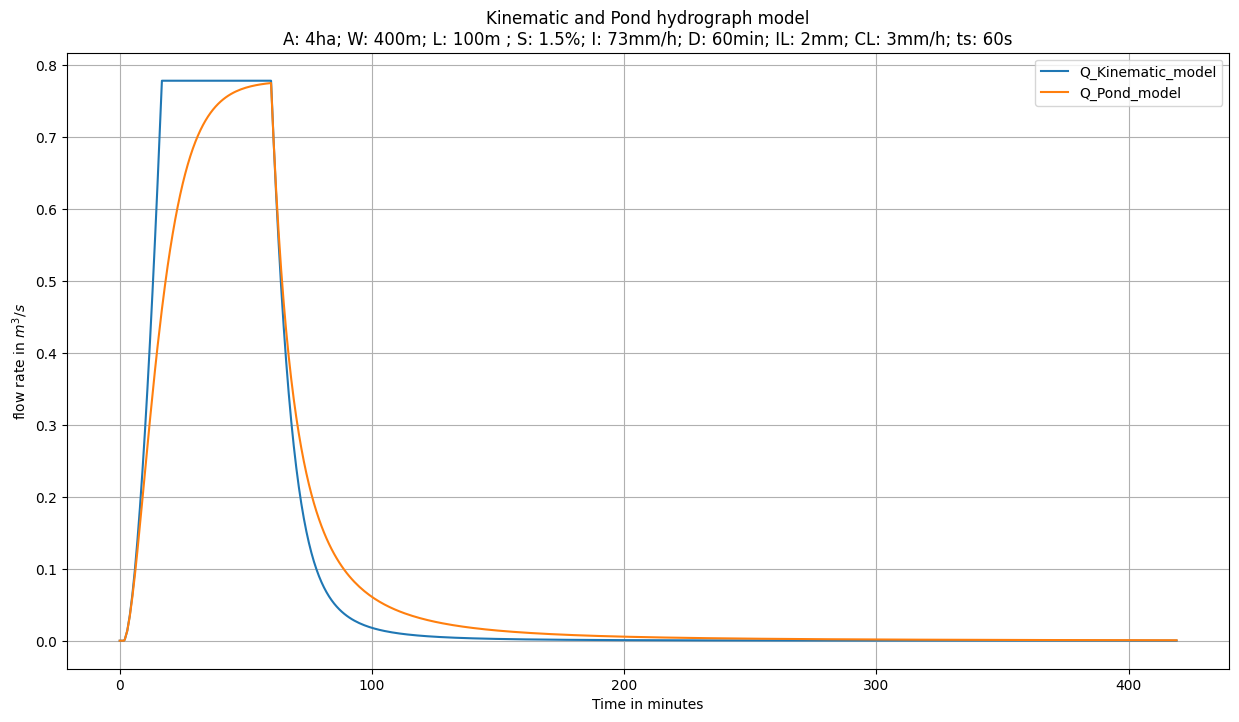

In [144]:
fig, ax = plt.subplots(figsize=(15,8))

ax = kin_pond_results.plot(
    # x='t_min_kinematic',
    x='t_min',
    y='Q_Kinematic_model',
    kind='line',
    ax=ax
    )

ax = kin_pond_results.plot(
    # x='t_min_pond',
    x='t_min',
    y='Q_Pond_model',
    kind='line',
    ax=ax
    )

ax.set_title('Kinematic and Pond hydrograph model\nA: {}ha; W: {}m; L: {}m ; S: {}%; I: {}mm/h; D: {}min; IL: {}mm; CL: {}mm/h; ts: {}s'.format(
    int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ))
ax.grid(visible=True)
ax.set_xlabel(xlabel='Time in minutes')
ax.set_ylabel(ylabel='flow rate in $m^{3}/s$')

fig.savefig(
    fname='{}Kinematic_and_Pond_model_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.png'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ))

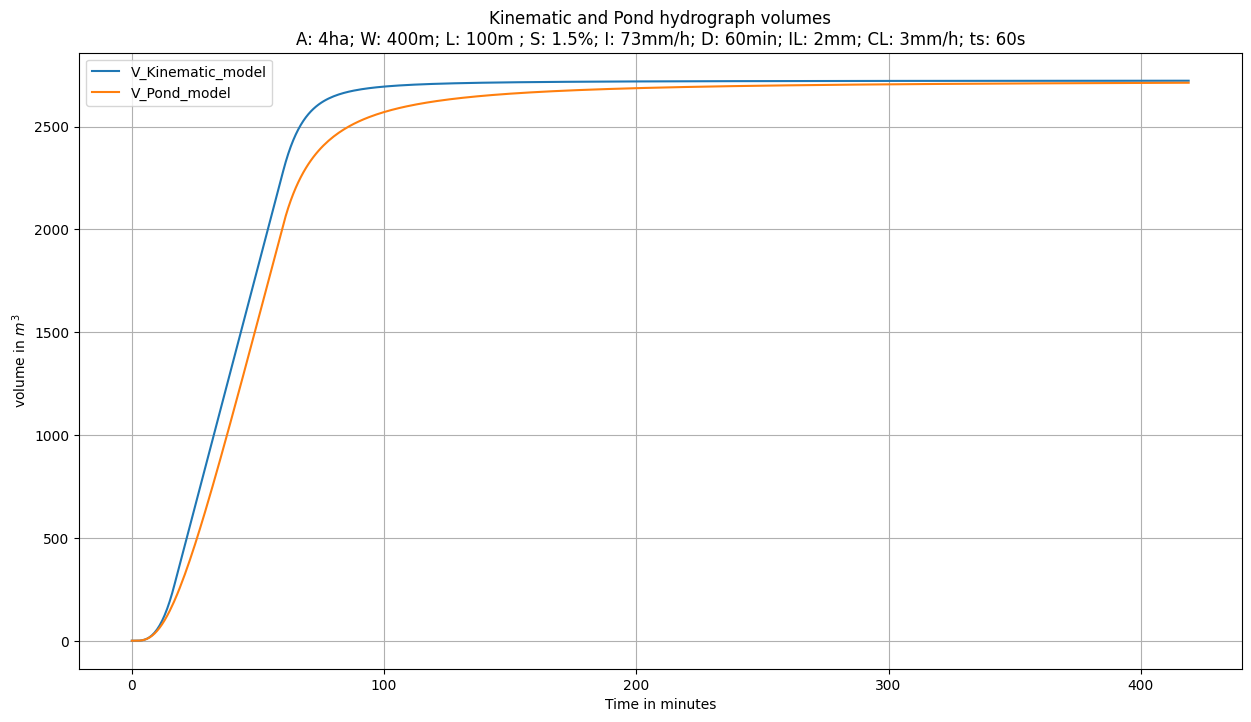

In [145]:
fig, ax = plt.subplots(figsize=(15,8))

ax = kin_pond_results.plot(
    # x='t_min_kinematic',
    x='t_min',
    y='V_Kinematic_model',
    kind='line',
    ax=ax
    )

ax = kin_pond_results.plot(
    # x='t_min_pond',
    x='t_min',
    y='V_Pond_model',
    kind='line',
    ax=ax
    )

ax.set_title('Kinematic and Pond hydrograph volumes\nA: {}ha; W: {}m; L: {}m ; S: {}%; I: {}mm/h; D: {}min; IL: {}mm; CL: {}mm/h; ts: {}s'.format(
    int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ))
ax.grid(visible=True)
ax.set_xlabel(xlabel='Time in minutes')
ax.set_ylabel(ylabel='volume in $m^{3}$')

fig.savefig(
    fname='{}Kinematic_and_Pond_volume_A{}_W{}_L{}_S{}_I{}_D{}_IL{}_CL{}_ts{}.png'.format(
        arg_output_dir, 
        int(round(catch_area/10000, 0)), 
        int(width), 
        int(length), 
        slope*100,
        int(round(intensity*1000*3600, 0)),
        int(duration/60),
        int(round(ini_loss*1000, 0)),
        int(round(cont_loss*1000*3600, 0)),
        step
        ))

In [146]:
kin_pond_results.V_Kinematic_model.max() - kin_pond_results.V_Pond_model.max()

9.854156245578451

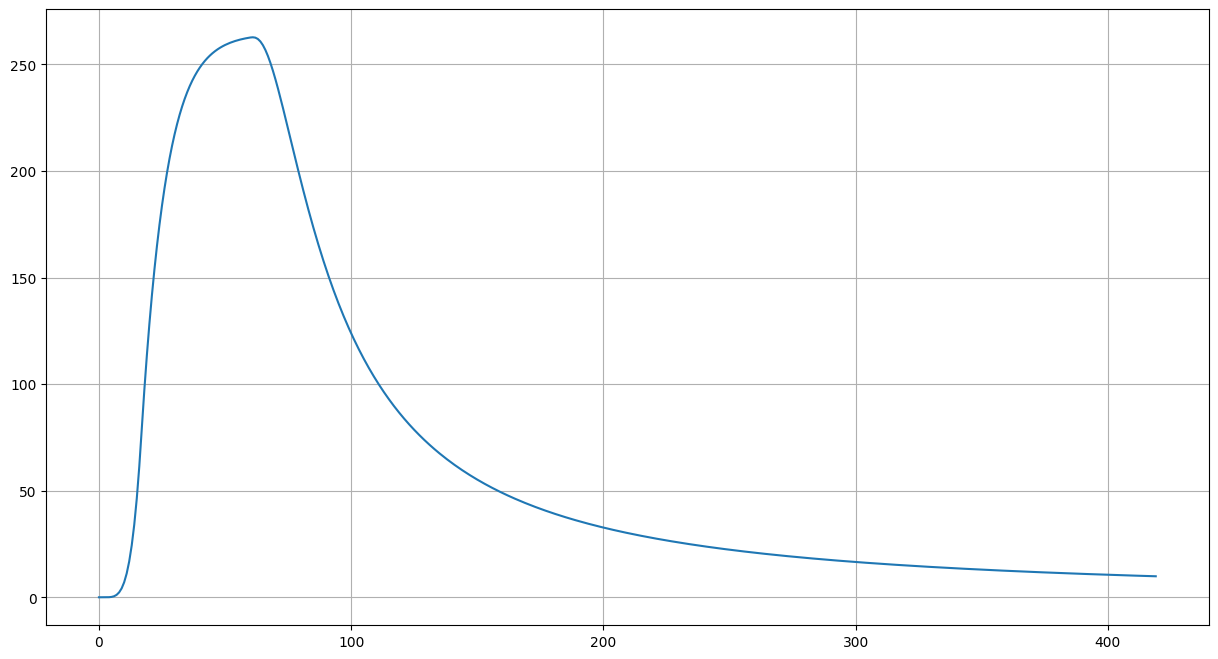

In [147]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(kin_pond_results.t_min, kin_pond_results.V_Kinematic_model - kin_pond_results.V_Pond_model)

ax.grid(visible=True)